In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
import os

if not os.path.exists("images"):
    os.mkdir("images")

 ## Supplementary function for grapics display

In [2]:
def plot(trace_num, x_data, y_data, xlable = 'xlable', ylable = 'ylable',
                legend = 'legend', title = 'title', mode='lines'):
    plot.counter += 1
    fig_name = 'images/' + str(plot.counter) + '.jpg'
    fig = go.Figure()
    for i in range(trace_num):
        fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode=mode, name=legend[i], showlegend = True))
    fig.update_layout(
        title=go.layout.Title(
            text=title,
        ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text=xlable
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text=ylable
            )
        )
    )
    fig.write_image(fig_name)
    display(Image(fig_name))
plot.counter = 0

## Load dataset

In [3]:
data = np.loadtxt('data_group6.txt')

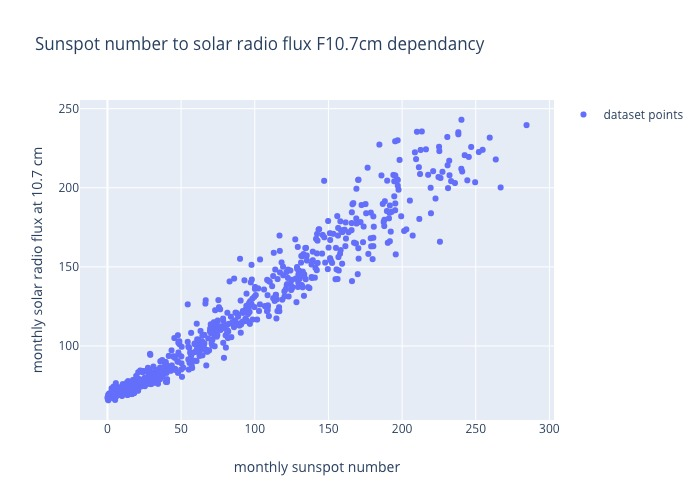

In [4]:
plot(1, [data[:,3]], [data[:,2]], 
           'monthly sunspot number', 'monthly solar radio flux at 10.7 cm',
           ['dataset points'], 'Sunspot number to solar radio flux F10.7cm dependancy',
           mode = 'markers')

## From the figure we can observe linear dependency between mounthly mean number of sunspot number and monthly mean solar radio flux F10.7cm dependancy
## Then we perform smoothing of mounthly mean data by 13-month running mean

In [5]:
sunspot_num_smth = np.empty(data.shape[0])
solar_flux_smth = np.empty(data.shape[0])
sunspot_num_smth[:6] = np.ones([1, 6]) * np.mean(data[:6,3])
sunspot_num_smth[-6:] = np.ones([1, 6]) * np.mean(data[-6:,3])
solar_flux_smth[:6] = np.ones([1, 6]) * np.mean(data[:6,2])
solar_flux_smth[-6:] = np.ones([1, 6]) * np.mean(data[-6:,2])
for i in range(6, data.shape[0] - 6):
    sunspot_num_smth[i] = 1/24 * (data[i-6][3] + data[i+6][3]) + 1/12 * (np.sum(data[i-5:i+6, 3]))
    solar_flux_smth[i] = 1/24 * (data[i-6][2] + data[i+6][2]) + 1/12 * (np.sum(data[i-5:i+6, 2]))

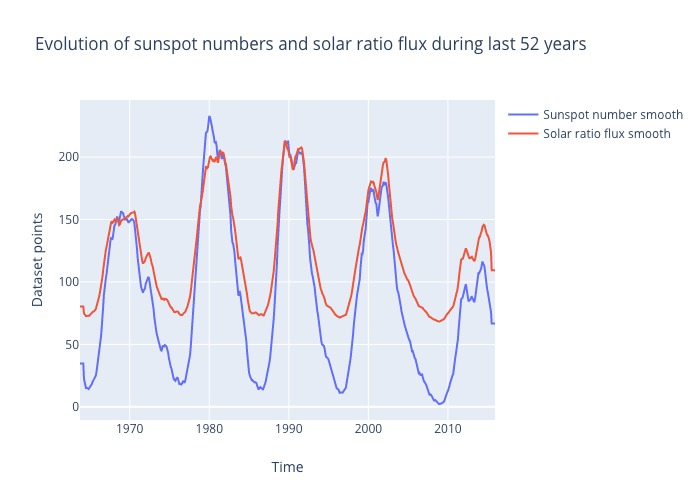

In [6]:
plot(2, [data[:,0] + data[:,1]/12, data[:,0] + data[:,1]/12], [sunspot_num_smth, solar_flux_smth],
     legend = ['Sunspot number smooth', 'Solar ratio flux smooth'], xlable = 'Time', ylable = 'Dataset points',
     title = 'Evolution of sunspot numbers and solar ratio flux during last 52 years')

## After smoothing data we can observe direct dependency more clearly
## Now constructing multi-dimensional linear regression 

In [7]:
# Vector of dependent variables, regressand, solar radio flux at 10.7 cm
F_exp = data[:, 2]

# Matrix of independent variables, regressor
R = np.ones([data.shape[0], 4])

# Vector of coefficients
beta = np.ones(4)
for i in range(4):
    R[:, i] = data[:, 3]**i
beta = np.linalg.inv((R.T.dot(R))).dot(R.T).dot(F_exp)

## Reconstructing solar radio flux at 10.7 cm on the basis of sunspot number

In [8]:
F = np.empty(F_exp.shape)
F = beta[0]*np.ones(data.shape[0])+beta[1]*data[:,3]+beta[2]*data[:,3]**2+beta[3]*data[:,3]**3

## Visualizing results with experimental data

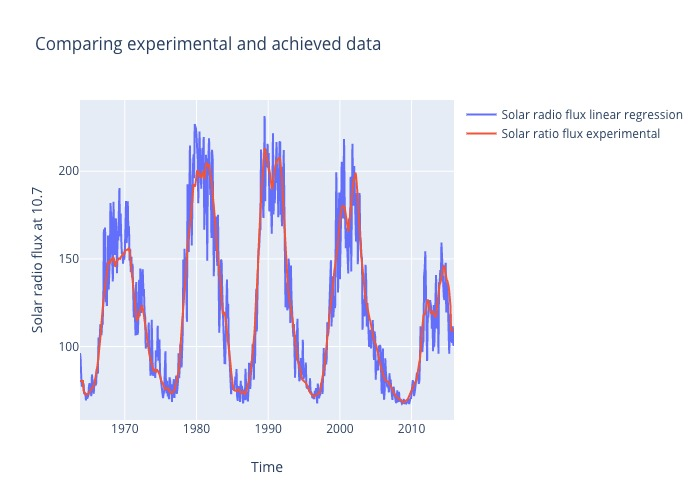

In [9]:
plot(2, [data[:,0] + data[:,1]/12, data[:,0] + data[:,1]/12], [F, solar_flux_smth],
     legend = ['Solar radio flux linear regression', 'Solar ratio flux experimental'],
     xlable = 'Time', ylable = 'Solar radio flux at 10.7',
     title = 'Comparing experimental and achieved data')

## Determine the variance of estimation error of solar radio flux at 10.7

In [10]:
mean = np.sum(F[:] - F_exp[:])
sigma = 1/(data.shape[0] - 1)*np.sum((F[:] - F_exp[:])**2)
print('Mean error = {}, variance of estimation error = {}'.format(mean, sigma))

Mean error = -1.061926013790071e-08, variance of estimation error = 105.94134453068308


## Conclusion